In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Contours

Introduction - https://docs.opencv.org/trunk/d4/d73/tutorial_py_contours_begin.html

cv2.findContours - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#findcontours


cv2.drawContours - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#drawcontours



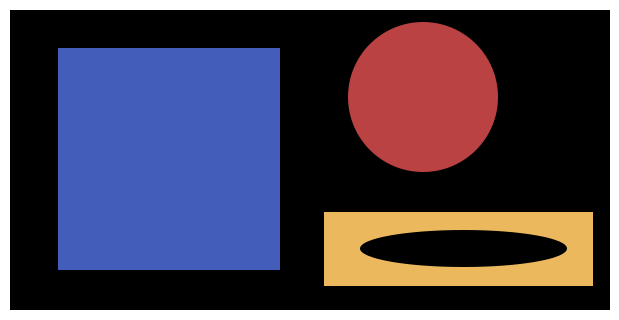

In [2]:
image = cv2.imread("images/basic_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)

3
4


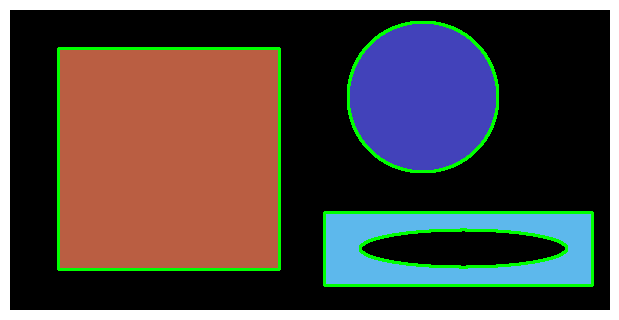

In [10]:
# find contours
contours = cv2.findContours(
    image=gray.copy(), 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)
contours = imutils.grab_contours(contours)
clone = image.copy()
print(len(contours))


# draw contours
cv2.drawContours(
    image=clone, 
    contours=contours, 
    contourIdx=-1, 
    color=(0, 255, 0), 
    thickness=2
)

display(clone, flip=False, cmap="gray")

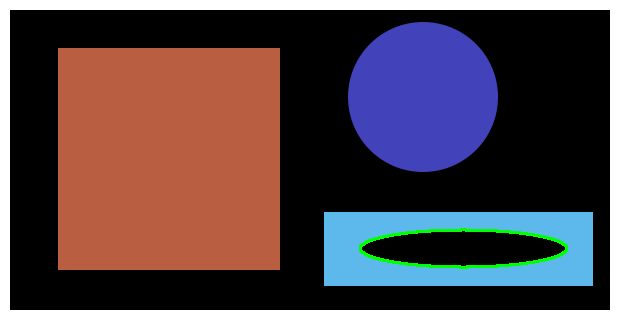

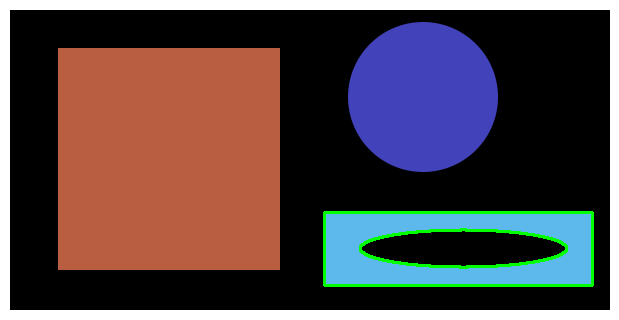

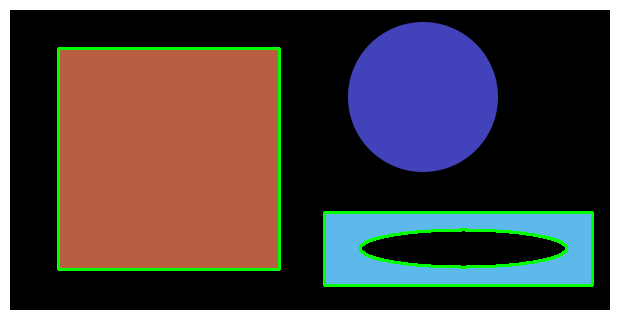

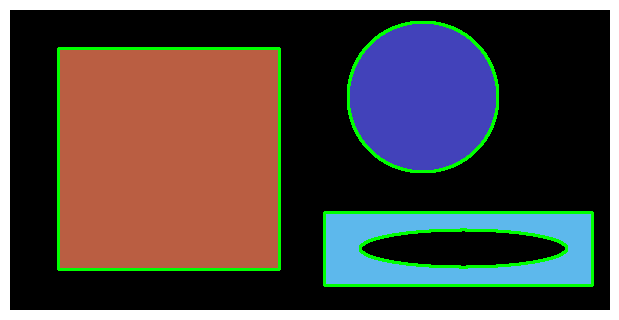

In [17]:
# drawing contours such that it will not draw one for the oval shape inside rectangle 
clone = image.copy()
for i, c in enumerate(contours):
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    display(clone, flip=False, cmap="gray")

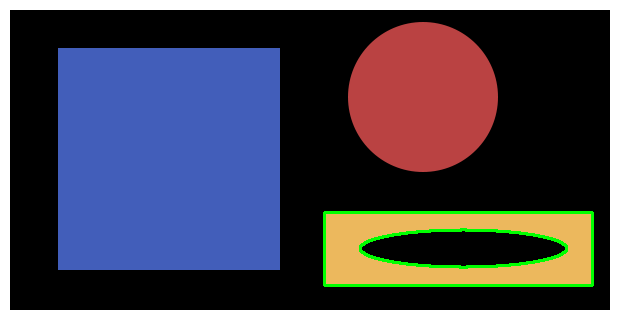

In [36]:
clone = image.copy()

# more pythonic way of doing above
cv2.drawContours(clone, list(contours[:2]), -1, (0, 255, 0), 2)
display(clone)

3


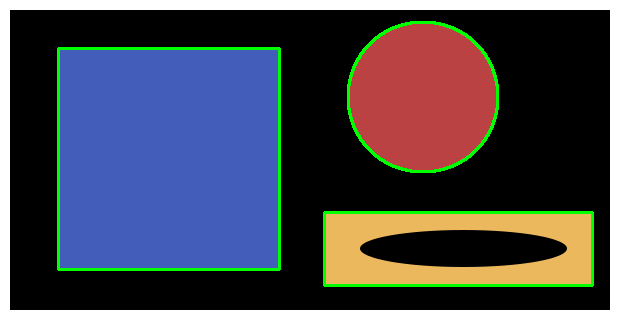

In [40]:
# find contours only for the outer regions of the rectangle

clone = image.copy()

contours = cv2.findContours(image=gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))
cv2.drawContours(clone, contours, -1, (0, 255, 0), 2)
display(clone)

### Using Masks and Contours Together

3


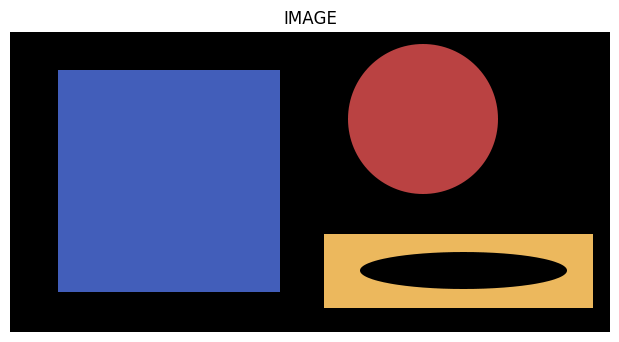

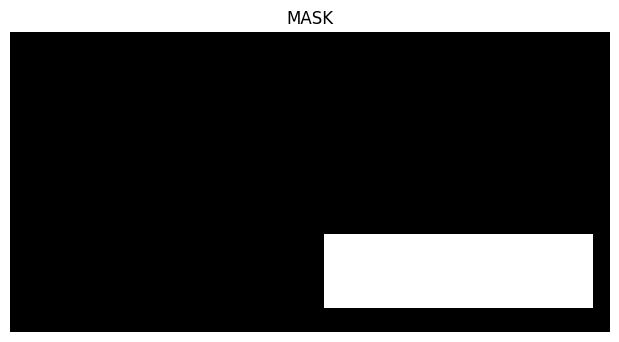

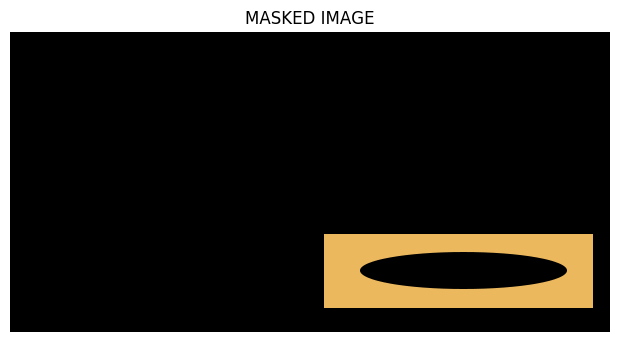

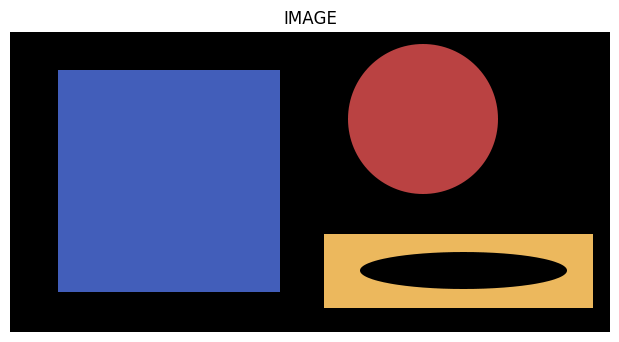

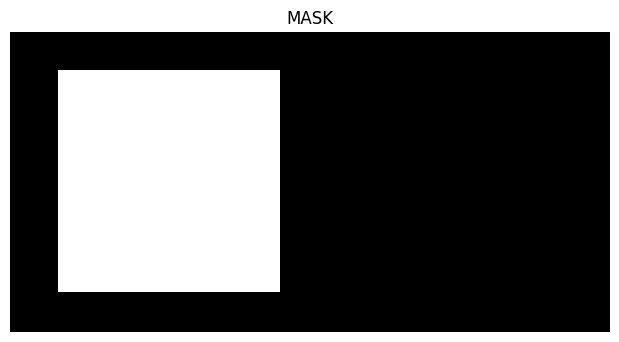

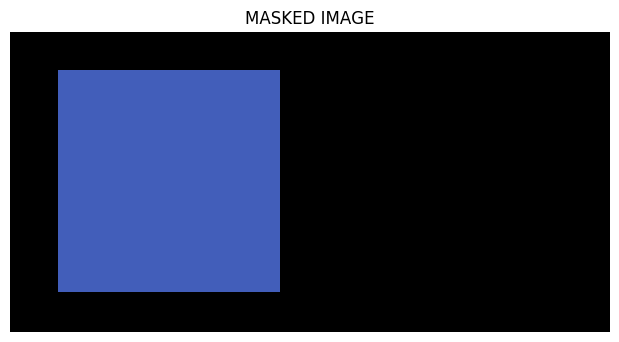

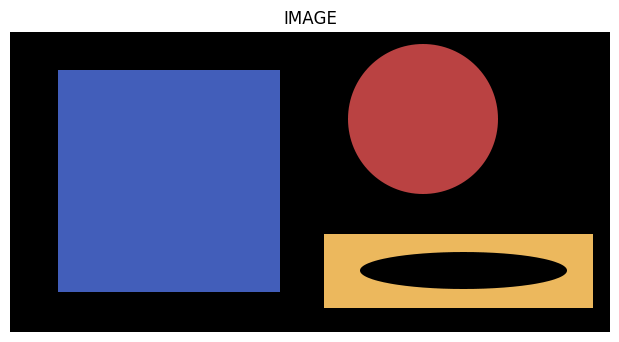

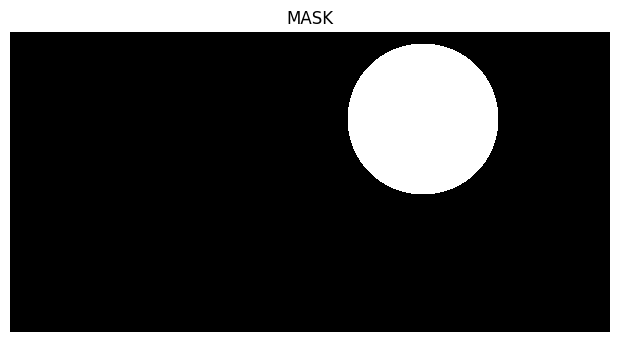

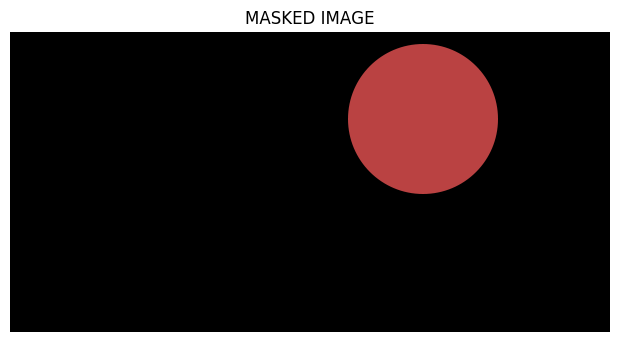

In [45]:
clone = image.copy()

contours = cv2.findContours(image=gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))

for c in contours:
    
    # construct mask 
    mask = np.zeros(gray.shape, dtype="uint8")
    
    # draw contours on mask
    cv2.drawContours(
        image=mask, 
        contours=[c], 
        contourIdx=-1,
        color=255, # indicating that we want to draw white
        thickness=-1 # indicating to fill the shape
    )
    
    # show
    display(image, title="IMAGE")
    display(mask, flip=False, cmap="gray", title="MASK")
    
    # masked - image + mask
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    display(masked_image, title="MASKED IMAGE")

### Simple Contour Properties

#### Centroid/Center of Mass

The “centroid” or “center of mass” is the center (x, y)-coordinate of an object in an image. This (x, y)-coordinate is actually calculated based on the *image moments*, which are based on the weighted average of the (x, y)-coordinates/pixel intensity along the contour.


Moments OpenCV - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html 

LearnOpenCv - https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/ 

In [4]:
image = cv2.imread("images/more_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
# find contours
contours = cv2.findContours(
    image=gray.copy(),
    mode=cv2.RETR_EXTERNAL,
    method=cv2.CHAIN_APPROX_SIMPLE
)
contours = imutils.grab_contours(contours)
print(len(contours))
clone = image.copy()

5


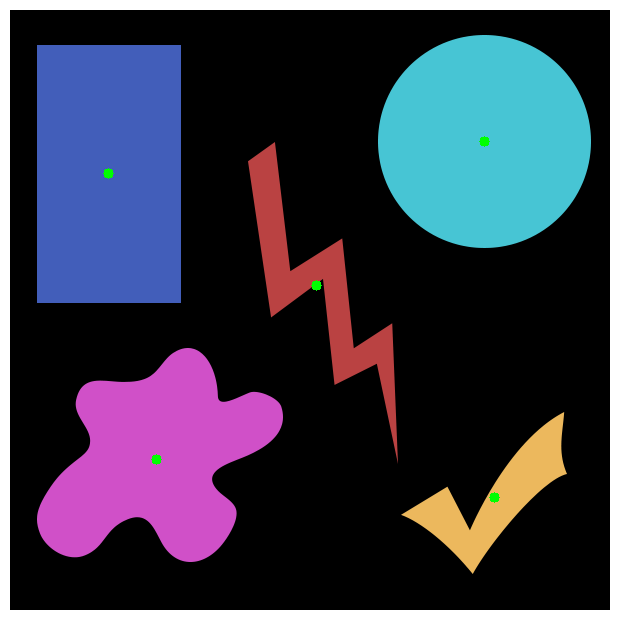

In [10]:
# loop through contours
for c in contours:
    # compute moments of the contour
    M = cv2.moments(c)
    # calculate center of mass from moments
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    
    # draw the center of contour on image
    cv2.circle(clone, (cX, cY), 5, (0, 255, 0), -1)
display(clone)
clone = image.copy()

In [11]:
c = contours[0]

In [12]:
M = cv2.moments(c)

In [13]:
M

{'m00': 8049.5,
 'm10': 3903962.333333333,
 'm01': 3922734.6666666665,
 'm20': 1907158065.0833333,
 'm11': 1893790021.2916665,
 'm02': 1921680020.4166665,
 'm30': 938201455016.0,
 'm21': 920845208946.35,
 'm12': 923650256033.9166,
 'm03': 946168538770.3,
 'mu20': 13758238.996564865,
 'mu11': -8714281.12805581,
 'mu02': 10027462.48531127,
 'mu30': -104842695.58312988,
 'mu21': -110702121.8282404,
 'mu12': 139629153.52789116,
 'mu03': -90357278.99804688,
 'nu20': 0.21233668845835862,
 'nu11': -0.13449116543829018,
 'nu02': 0.1547580455829436,
 'nu30': -0.01803499044883371,
 'nu21': -0.019042926154592285,
 'nu12': 0.02401894033960202,
 'nu03': -0.015543216002303874}

####  Area and Perimeter

The area of the contour is the ***number of pixels that reside inside the contour outline***. Similarly, the perimeter ***(sometimes called arc length) is the length of the contour***.

Contour#: 1, Area: 8049.50, Perimeter: 577.39
Contour#: 2, Area: 30873.00, Perimeter: 893.32
Contour#: 3, Area: 10435.50, Perimeter: 1038.54
Contour#: 4, Area: 36751.00, Perimeter: 800.00
Contour#: 5, Area: 35702.00, Perimeter: 705.07


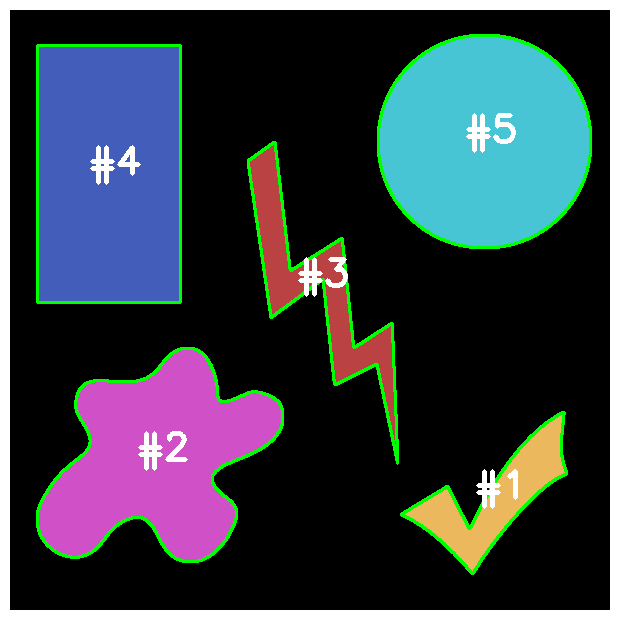

In [14]:
clone = image.copy()

for i, c in enumerate(contours):
    
    # compute the area
    area = cv2.contourArea(c)
    # compute perimeter or arc length
    perimeter = cv2.arcLength(c, True)
    # display
    print("Contour#: {}, Area: {:.2f}, Perimeter: {:.2f}".format(i+1, area, perimeter))
    
    # draw contours
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    
    # compute the center of the contour and draw contour number
    M = cv2.moments(c)
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    
    # draw text in center
    cv2.putText(
        clone, "#{}".format(i+1), (cX-20, cY), cv2.FONT_HERSHEY_SIMPLEX, 
        1.25, (255, 255, 255), 4
    )
display(clone)

#### Bounding Boxes

A bounding box is exactly what it sounds like — an upright rectangle that “bounds” and “contains” the entire contoured region of the image. However, it does not consider the rotation of the shape, so you’ll want to keep that in mind.

A bounding box consists of four components: the starting x-coordinate of the box, then the starting y-coordinate of the box, followed by the width and height of the box.

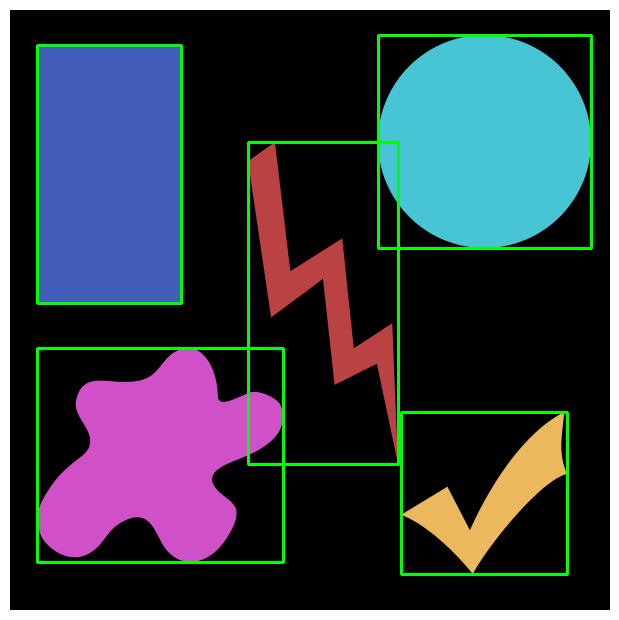

In [15]:
clone = image.copy()

# loop through contours
for c in contours:
    # fit a bounding box
    (x, y, w, h) = cv2.boundingRect(c)
    # draw a rectangle
    cv2.rectangle(clone, (x, y), (x+w, y+h), (0, 255, 0), 2)
display(clone)

#### Rotated Bounding Boxes

cv2.minAreaRect - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=minarearect 

cv2.boxPoints - https://docs.opencv.org/trunk/d3/dc0/group__imgproc__shape.html#gaf78d467e024b4d7936cf9397185d2f5c


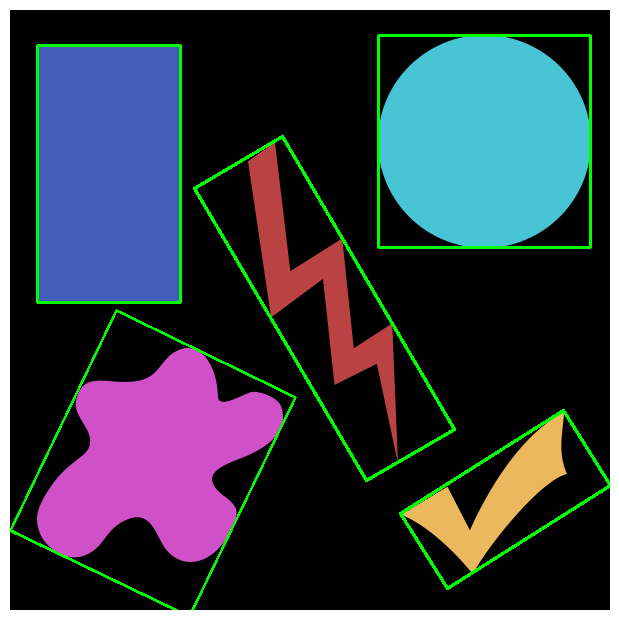

In [21]:
clone = image.copy()
# loop through contours
for c in contours:
    # fit a rotated rectangle 
    # box = ((x, y), (w, h), rotation'theta')
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(box))
    # print("Box: {}".format(box))
    # display(box)
    cv2.drawContours(clone, [box], -1, (0, 255, 0), 2)
    
display(clone)


#### Minimum Enclosing Circles 

In [22]:
clone = image.copy()

# loop through contours
for c in contours:
    # fit a minimum enclosing circle
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone, (int(x), int(y)), int(radius), (0, 255, 0), 2)
display()

TypeError: an integer is required (got type type)